In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import count
from scipy.sparse import csc_matrix, lil_matrix

In [2]:
def plot(concentrations):
    fig = plt.imshow(concentrations, cmap='magma')
    plt.colorbar(fig)
    plt.gca().invert_yaxis()
    plt.show()

In [3]:
type1_houses = [(69,111), (69,264), (138,12), (138,165), (192,111), (192,264), (261,12), (261,165)]
type2_houses = [(69,12), (69,165), (192,12), (192,165)]
type3_houses = [(138,51), (138,204), (261,51), (261,204)]

def is_in_house(x, y):    
    for hx, hy in type1_houses:
        if (hx < x and x < hx + 18 and hy < y and y < hy + 18):
            return True

    for hx, hy in type2_houses:
        if (hx < x < hx + 18 and hy < y < hy + 78) or (hx < x < hx + 30 and hy < y < hy + 18):
            return True

    for hx, hy in type3_houses:
        if (hx < x < hx + 18 and hy < y < hy + 78) or (hx - 12 < x < hx + 18 and hy + 60 < y < hy + 78):
            return True

    return False

In [4]:
def is_under_edge_condition(x, y, M):
    if x > M - 1 or y > M - 1 or y <= 0:
        return True

    x = x * 300 / M
    y = y * 300 / M
    return is_in_house(x, y) 

In [5]:
def solve(M=300, eps=1e-8):  
    k = 0.5
    l1 = 1
    l2 = 0
    
    h = 1 / M
    tau = 1 / (4 * k * M * M)
    
    dx = [0, 1, -1, 0, 0]
    dy = [0, 0, 0, 1, -1]
    coeffs = [
            1 - 4 * tau * k / (h ** 2),
            tau * (k / (h ** 2) - l1 / (2 * h)),
            tau * (k / (h ** 2) + l1 / (2 * h)),
            tau * (k / (h ** 2) - l2 / (2 * h)),
            tau * (k / (h ** 2) + l2 / (2 * h))
        ]
    
    A = lil_matrix((M * M, M * M), dtype=np.float64)
    b = np.zeros(M * M)
    
    for x in range(M): 
        for y in range(M):
            i = x * M + y
            if x == 0:
                A[i, i] = 1
            elif not is_under_edge_condition(x, y, M):
                for d in range(5):
                    neighbour_x = x + dx[d]
                    neighbour_y = y + dy[d]
                    if d == 0:
                        A[i, i] = coeffs[0]
                    elif neighbour_x == 0:
                        b[i] += coeffs[d]
                    elif is_under_edge_condition(neighbour_x, neighbour_y, M):
                        A[i, i] += coeffs[d]
                    else:
                        j = neighbour_x * M + neighbour_y
                        A[i, j] = coeffs[d]

    A = csc_matrix(A)
    
    u_last= np.zeros(M * M)
    u_last[0:M] = 1
    
    for i in count(0, 1):
        u = A @ u_last + b
        error = np.max(np.abs((u - u_last) / np.maximum(1, u_last)))
        u_last = u
        if error <= eps:
            print(f"Number of iterations: {i}.")
            break

    result = u.reshape((M, M)).T
    return result

Number of iterations: 36163.


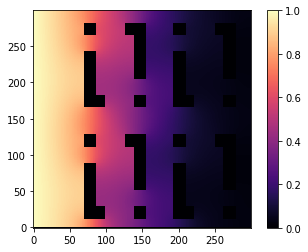

In [6]:
result = solve(eps=1e-5)
plot(result)

Number of iterations: 303118.


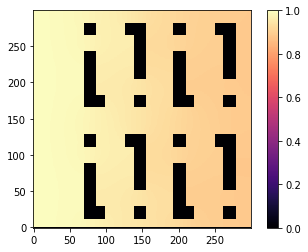

In [7]:
result = solve(eps=1e-6)
plot(result)